In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xlwings import App, Book
from rotalysis import UtilityFunctions as uf
from rotalysis import PumpFunctions   as pf


In [2]:
data=r"C:\Users\IDM252577\Desktop\570-P-2900 Data.xlsx"

In [3]:

dfPumpdata=pd.read_excel(data,sheet_name=0,header=1)
dfPumpdata.head()

,start,end,suction_pressure,Suction Vessel Level,Vessel/Pump Suction Temperature,discharge_pressure,Pump Discharge Temperature,flowrate,Pump Minimum Circulation Flowrate,cv_opening,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Measuring Instrument,NaN,570-PI-2012.PV,LIC- NA,TI-NA,570-PI-2008.PV,TT-N/A,570-FIC-2003.PV,FIC-2004,570-HIC-2004.MV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start,End,barg,NaN,NaN,barg,NaN,m3/h,NaN,%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00,2020-01-01 01:00:00,[-11059] No Good Data For Calculation,Tag not found,Tag not found,[-11059] No Good Data For Calculation,Tag not found,[-11059] No Good Data For Calculation,Tag not found,[-11059] No Good Data For Calculation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 01:00:00,2020-01-01 02:00:00,[-11059] No Good Data For Calculation,NaN,NaN,[-11059] No Good Data For Calculation,NaN,[-11059] No Good Data For Calculation,NaN,[-11059] No Good Data For Calculation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 02:00:00,2020-01-01 03:00:00,[-11059] No Good Data For Calculation,NaN,NaN,[-11059] No Good Data For Calculation,NaN,[-11059] No Good Data For Calculation,NaN,[-11059] No Good Data For Calculation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfOperation = PumpOperation.Remove_Non_operating_points(dfPumpdata,["cv_opening","downstream_pressure"])

In [5]:
columns=["flowrate","suction_pressure","discharge_pressure","downstream_pressure","cv_opening","base_power"]
dfOperation=dfOperation[columns]

In [6]:
dfOperation = PumpOperation.get_flowrate_percent(dfOperation,percent=0.05)

In [7]:
dfOperation = PumpOperation.add_efficiency(dfOperation)

In [8]:
dfOperation = PumpOperation.get_differential_pressure(dfOperation)

In [9]:
dfOperation["base_case_energy_consumption"] = PumpOperation.get_power(dfOperation,case="base")

In [10]:
dfOperation = PumpOperation.add_standard_columns(dfOperation)

In [11]:
PumpOperation.get_calculated_cv_pressure_drop(dfOperation)

In [ ]:
dfOperation = PumpOperation.get_required_diff_pressure(dfOperation)

In [ ]:
dfOperation = PumpOperation.get_speed_variation(dfOperation)

In [ ]:
dfEnergy = pd.DataFrame(columns=calc_parameters)

In [ ]:
dfEnergy["flowrate_percent"] = dfOperation["flowrate_percent"].unique()

In [ ]:
dfOperation =  dfOperation.apply(pd.to_numeric,errors="coerce")

In [ ]:
dfEnergy =  PumpOperation.create_energy_calculator(dfOperation)

In [ ]:
PumpOperation.get_calculated_cv_pressure_drop(dfOperation)

In [ ]:
dfEnergy["bin_center"]=dfEnergy["flowrate_percent"]*dfEnergy["rated_flowrate"]

In [ ]:
dfEnergy.to_excel("dfEnergycopy.xlsx")

In [ ]:
savepath = r"C:\Users\IDM252577\Desktop\dfEnergy_570-P-2700.xlsx"
sheetname = dfEnergy["selected_option"][0]
UtilityFunctions.write_to_excel(savepath,sheetname,dfEnergy)

In [1]:
path = r"T:\Project\aeT00989.00 Decarbonization Feasibility Study\03. Client design information\ReferenceDocs\05. Umm Lulu_UL\576-CM-2069_Vapor Recovery Compressor\12. Operational Data\576-CM-2069\History Data\576CM2069_HisData.csv"

In [3]:
import pandas as pd
df=  pd.read_csv(path,header=1)

C:\Users\IDM252577\AppData\Local\Temp\ipykernel_18216\1674792914.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=  pd.read_csv(path,header=1)


In [4]:
df

,Timestamp,576-PI-2608.PV,576-TI-2601.PV,576-PI-2611.PV\n,576-TI-2603.PV,576-ZI-2600.PV,576-KI-2710.PV,576-PI-2619.PV,576-TI-2612.PV,576-PI-2625.PV,...,576-TI-2734.PV,576-TI-2730.PV,576-TI-2731.PV,576-VI-2715-2.PV,576-PDI-2718.PV,576-PI-2720-1.PV,576-TI-2719.PV,576-PI-2721.PV,576-LI-2717.PV,576-TI-2717.PV
0,01/01/2019 00:00,No Data,No Data,Tag not found,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
1,01/01/2019 00:05,No Data,No Data,Tag not found,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
2,01/01/2019 00:10,No Data,No Data,NaN,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
3,01/01/2019 00:15,No Data,No Data,NaN,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4,01/01/2019 00:20,No Data,No Data,NaN,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415868,14/12/2022 23:40,0.005261,25.375366,NaN,25.415039,98.901001,0,0.0,25.93404,0.00214,...,32,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
415869,14/12/2022 23:45,0.005261,25.549316,NaN,25.415039,98.901001,0,0.0,25.93404,0.00214,...,32,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
415870,14/12/2022 23:50,0.005762,25.549316,NaN,25.415039,98.901001,0,0.0,25.93404,0.00214,...,32,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
415871,14/12/2022 23:55,0.005762,25.549316,NaN,25.415039,98.901001,0,0.0,25.93404,0.00214,...,32,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881


In [10]:
from rotalysis import UtilityFunction as uf
import matplotlib.pyplot as plt

In [7]:
df = uf.Clean_dataframe(df)

In [8]:
df

,576-PI-2608.PV,576-TI-2601.PV,576-TI-2603.PV,576-ZI-2600.PV,576-KI-2710.PV,576-PI-2619.PV,576-TI-2612.PV,576-PI-2625.PV,576-FI-2601.PV,576-KI-2710.PV.1,...,576-TI-2734.PV,576-TI-2730.PV,576-TI-2731.PV,576-VI-2715-2.PV,576-PDI-2718.PV,576-PI-2720-1.PV,576-TI-2719.PV,576-PI-2721.PV,576-LI-2717.PV,576-TI-2717.PV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191056,0.005261,25.375366,25.415039,98.901001,0.0,0.0,25.934040,0.00214,0.0,0.0,...,32.0,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
191057,0.005261,25.549316,25.415039,98.901001,0.0,0.0,25.934040,0.00214,0.0,0.0,...,32.0,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
191058,0.005762,25.549316,25.415039,98.901001,0.0,0.0,25.934040,0.00214,0.0,0.0,...,32.0,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881
191059,0.005762,25.549316,25.415039,98.901001,0.0,0.0,25.934040,0.00214,0.0,0.0,...,32.0,26.9869,30.0149,1.0989,-0.006838,0.087912,25.2747,-0.042979,73.406525,43.076881


<Axes: >

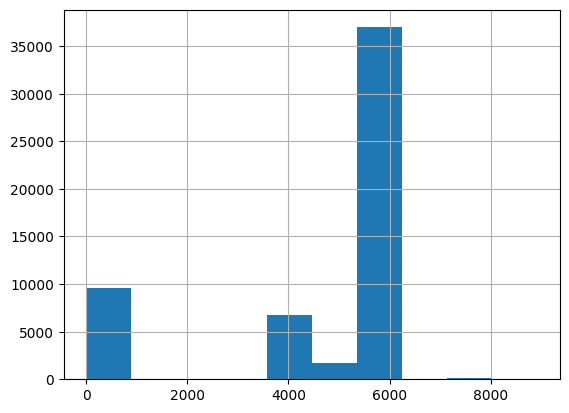

In [14]:
df.loc[df["576-FI-2601.PV"]>0,"576-FI-2601.PV"].hist()

<Axes: >

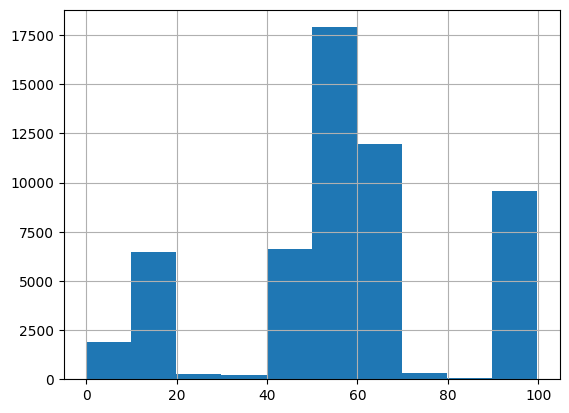

In [15]:
df.loc[df["576-FI-2601.PV"]>0,"576-ZI-2601.PV"].hist()